<a href="https://colab.research.google.com/github/jhosnatas/AnaliseSarampo/blob/main/AnaliseSarampo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instale a biblioteca mysql-connector-python
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importe a biblioteca mysql.connector
import mysql.connector
# Importe a biblioteca de plotagem
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Conecte-se ao banco de dados
mydb = mysql.connector.connect(
  host="144.22.209.192",
  user="soboradm",
  password="soboradm",
  database="saboroso"
)

In [ ]:
query = "SELECT YEAR , COVERAGE  FROM  brasil WHERE COVERAGE_CATEGORY_DESCRIPTION = 'WHO/UNICEF Estimates of National Immunization Coverage' "
df = pd.read_sql(query, con=mydb)
##print(df.head())

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


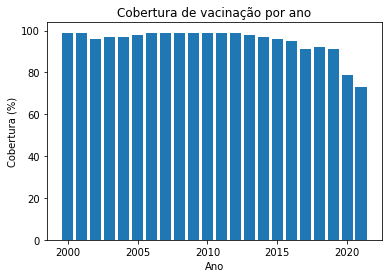

In [ ]:
plt.bar(df['YEAR'], df['COVERAGE'])
# Adicione um título e rótulos de eixo ao gráfico
plt.title('Cobertura de vacinação por ano')
plt.xlabel('Ano')
plt.ylabel('Cobertura (%)')
# Exiba o gráfico
plt.show()

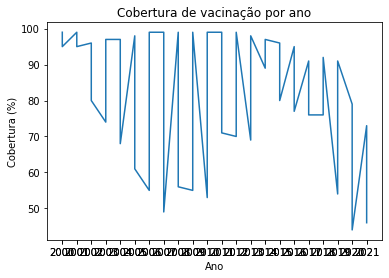

In [ ]:
plt.plot(df['YEAR'], df['COVERAGE'])
plt.xticks(df['YEAR'])
# Defina as dimensões da figura
##plt.figure(figsize=(40, 25))
# Adicione um título e rótulos de eixo ao gráfico
plt.title('Cobertura de vacinação por ano')
plt.xlabel('Ano')
plt.ylabel('Cobertura (%)')
# Exiba o gráfico
plt.show()

In [ ]:
query = "SELECT CODE , YEAR , COVERAGE , ANTIGEN FROM mundo WHERE CODE  = 'BRA' OR CODE = 'USA' AND ANTIGEN = 'MCV1'  AND COVERAGE_CATEGORY_DESCRIPTION = 'WHO/UNICEF Estimates of National Immunization Coverage' ;"
df = pd.read_sql(query, con=mydb)
print(df)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


    CODE  YEAR  COVERAGE ANTIGEN
0    BRA  2021      46.0    MCV2
1    BRA  2021      73.0    MCV1
2    BRA  2020      79.0    MCV1
3    BRA  2020      43.0    MCV2
4    BRA  2019      54.0    MCV2
..   ...   ...       ...     ...
177  USA  1998      92.0    MCV1
178  USA  1997      91.0    MCV1
179  USA  1996      91.0    MCV1
180  USA  1995      88.0    MCV1
181  USA  1994      89.0    MCV1

[182 rows x 4 columns]


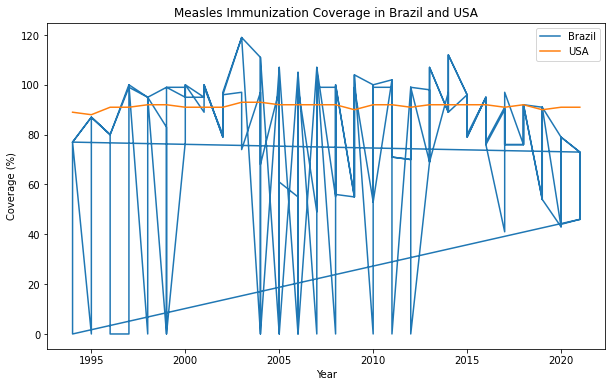

In [ ]:
import matplotlib.pyplot as plt

# Filter data for Brazil
df_bra = df[df['CODE'] == 'BRA']

# Filter data for USA
df_usa = df[df['CODE'] == 'USA']

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(10, 6))

# Add lines to the plot
ax.plot(df_bra['YEAR'], df_bra['COVERAGE'], label='Brazil')
ax.plot(df_usa['YEAR'], df_usa['COVERAGE'], label='USA')

# Set plot title and axis labels
ax.set_title('Measles Immunization Coverage in Brazil and USA')
ax.set_xlabel('Year')
ax.set_ylabel('Coverage (%)')

# Add legend to the plot
ax.legend()

# Show the plot
plt.show()


In [ ]:
#DESVIO
LINHAZERO = "SELECT CODE , YEAR , COVERAGE , ANTIGEN FROM mundo WHERE CODE  = 'BRA' OR CODE = 'USA' AND COVERAGE = '0' AND COVERAGE_CATEGORY_DESCRIPTION = 'WHO/UNICEF Estimates of National Immunization Coverage' ;"
dff = pd.read_sql(LINHAZERO, con=mydb)
print(dff)

/usr/local/lib/python3.9/dist-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


    CODE  YEAR  COVERAGE ANTIGEN
0    BRA  2021      46.0    MCV2
1    BRA  2021      73.0    MCV1
2    BRA  2020      79.0    MCV1
3    BRA  2020      43.0    MCV2
4    BRA  2019      54.0    MCV2
..   ...   ...       ...     ...
149  BRA  1998      95.0    MCV1
150  BRA  1997      99.0    MCV1
151  BRA  1996      80.0    MCV1
152  BRA  1995      87.0    MCV1
153  BRA  1994      77.0    MCV1

[154 rows x 4 columns]
